# PROBLEM STATEMENT

The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following: 

-------------
DATA SOURCE: https://www.kaggle.com/c/titanic

- Pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex:    Sex	
- Age:    Age in years	
- Sibsp:	# of siblings / spouses aboard the Titanic	
- Parch:	# of parents / children aboard the Titanic	
- Ticket:	Ticket number	
- Fare:	Passenger fare	
- Cabin:	Cabin number	
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
---------------
- Target class: Survived: Survival	(0 = No, 1 = Yes)

# Table of Contents

- 1 Importing Relevant Libraries
- 2 Loading Raw Data
- 3 Preprocessing
    - 3.1 Exploring the Descriptive Statistics of the Variables
    - 3.2  Exploring the Variables
    - 3.3 Data Cleaning
    - 3.4 Data Scaling
    - 3.5 Handing Catagorized Variables
- 4 Train Test Split
- 5 Select and Train a Model
    - 5.1 Linear regression model
- 6 Apply Model on Test Set

# 1 Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2 Loading Raw Data

In [2]:
# read the data using pandas dataframe
training_set = pd.read_csv('Train_Titanic.csv')

In [3]:
# Show the data head!
training_set.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [4]:
# Show the data head!
training_set.tail(2)

PassengerId  Survived  Pclass                   Name   Sex   Age  SibSp  \
889          890         1       1  Behr, Mr. Karl Howell  male  26.0      0   
890          891         0       3    Dooley, Mr. Patrick  male  32.0      0   

     Parch  Ticket   Fare Cabin Embarked  
889      0  111369  30.00  C148        C  
890      0  370376   7.75   NaN        Q

# 3 Preprocessing

## 3.1 Exploring the Descriptive Statistics of the Variables

In [5]:
# Let's count the number of survivors and non-survivors
survived    = training_set[training_set['Survived']==1]
no_survived = training_set[training_set['Survived']==0]

In [6]:
# Count the survived and deceased 
print("Total =", len(training_set))
print("Number of Survived passengers =", len(survived))
print("Percentage Survived =", 1.*len(survived)/len(training_set)*100.0, "%")
print("Did not Survive =", len(no_survived))
print("Percentage who did not survive =", 1.*len(no_survived)/len(training_set)*100.0, "%")

Total = 891
Number of Survived passengers = 342
Percentage Survived = 38.38383838383838 %
Did not Survive = 549
Percentage who did not survive = 61.61616161616161 %


## 3.2  Exploring the Variables

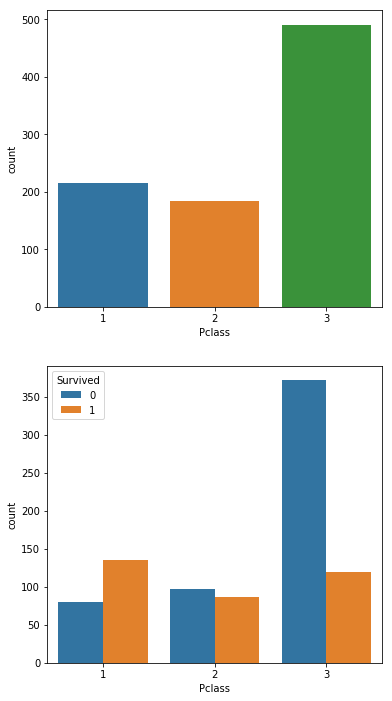

In [7]:
# Bar Chart to indicate the number of people survived based on their class
# If you are a first class, you have a higher chance of survival
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = training_set)
plt.subplot(212)
sns.countplot(x = 'Pclass', hue = 'Survived', data=training_set)

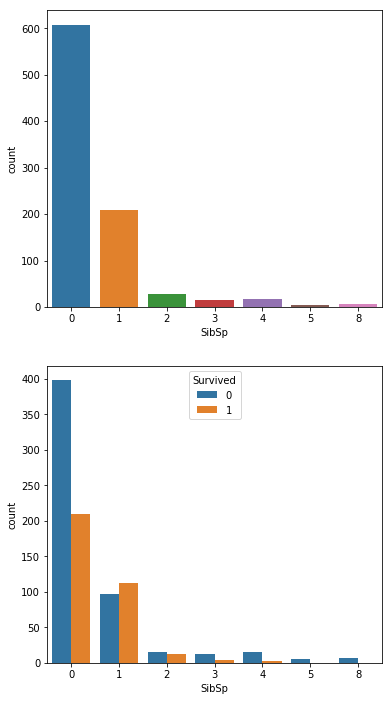

In [8]:
# Bar Chart to indicate the number of people survived based on their siblings status
# If you have 1 siblings (SibSp = 1), you have a higher chance of survival compared to being alone (SibSp = 0)
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'SibSp', data=training_set)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue = 'Survived', data=training_set)

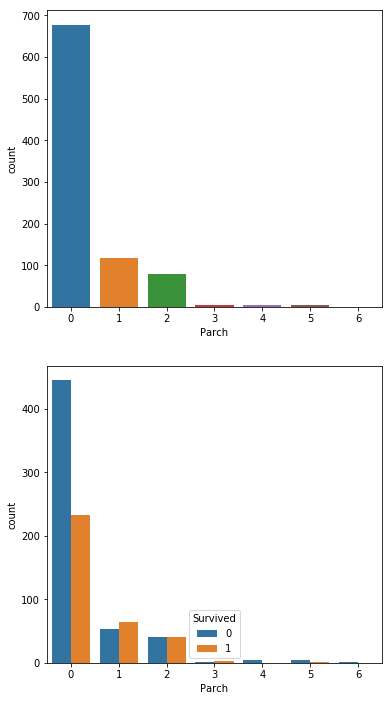

In [9]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard)
# If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Parch', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Parch', hue = 'Survived', data=training_set)

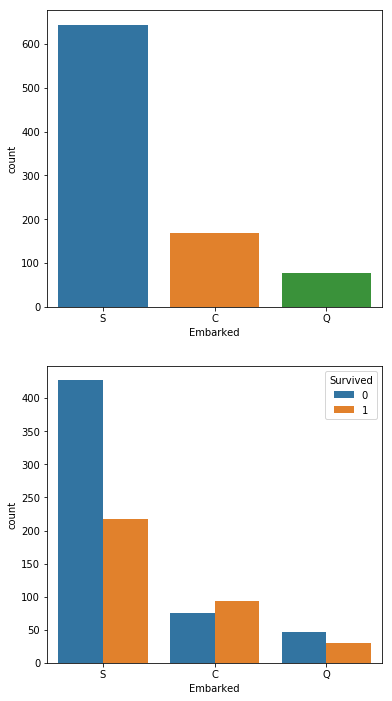

In [10]:
# Bar Chart to indicate the number of people survived based on the port they emparked from
# Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
# If you embarked from port "C", you have a higher chance of survival compared to other ports!
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Embarked', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Embarked', hue = 'Survived', data=training_set)

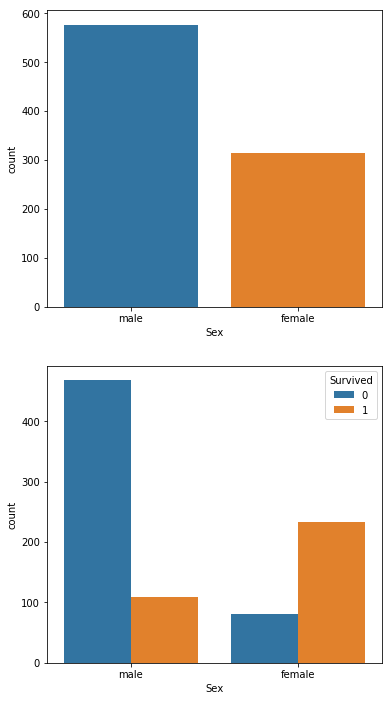

In [11]:
# Bar Chart to indicate the number of people survived based on their sex
# If you are a female, you have a higher chance of survival compared to other ports!
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Sex', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data=training_set)

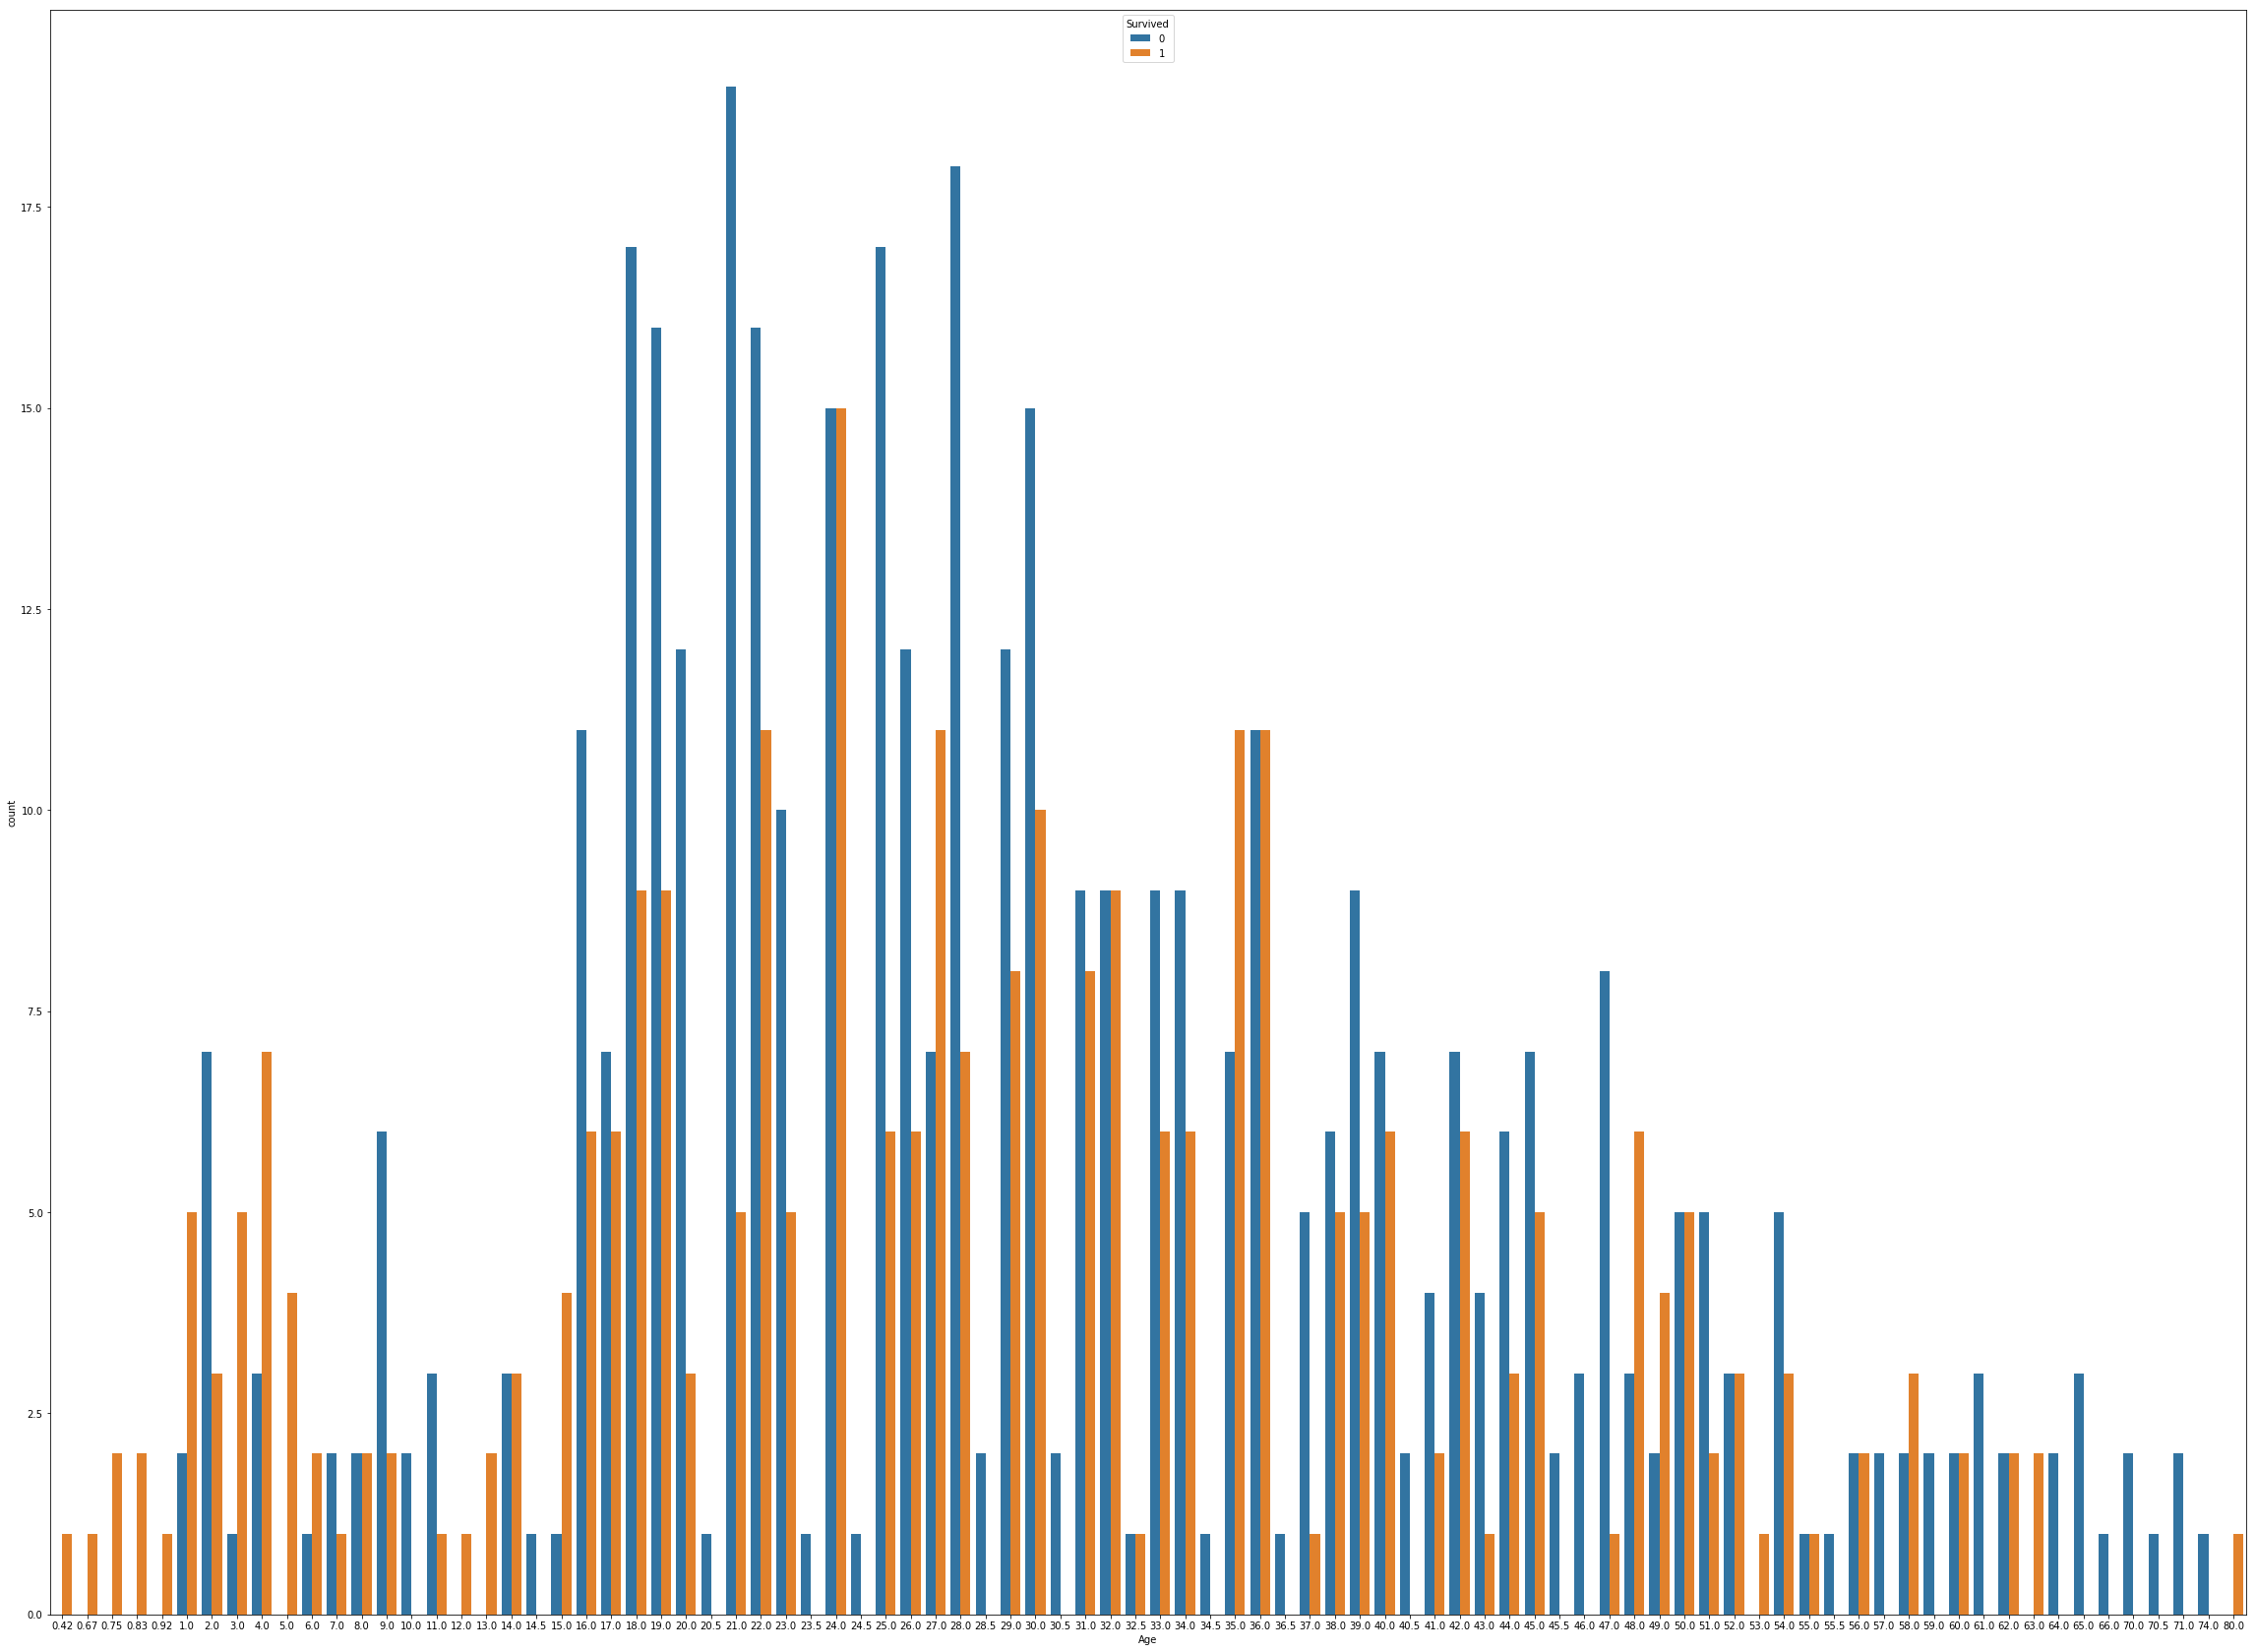

In [12]:
# Bar Chart to indicate the number of people survived based on their age
# If you are a baby, you have a higher chance of survival
plt.figure(figsize=(40,30))
sns.countplot(x = 'Age', hue = 'Survived', data=training_set)

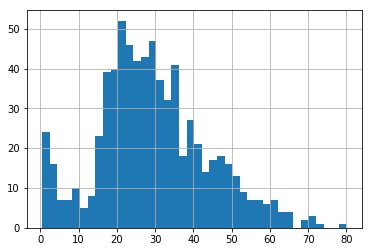

In [13]:
# Age Histogram 
training_set['Age'].hist(bins = 40)

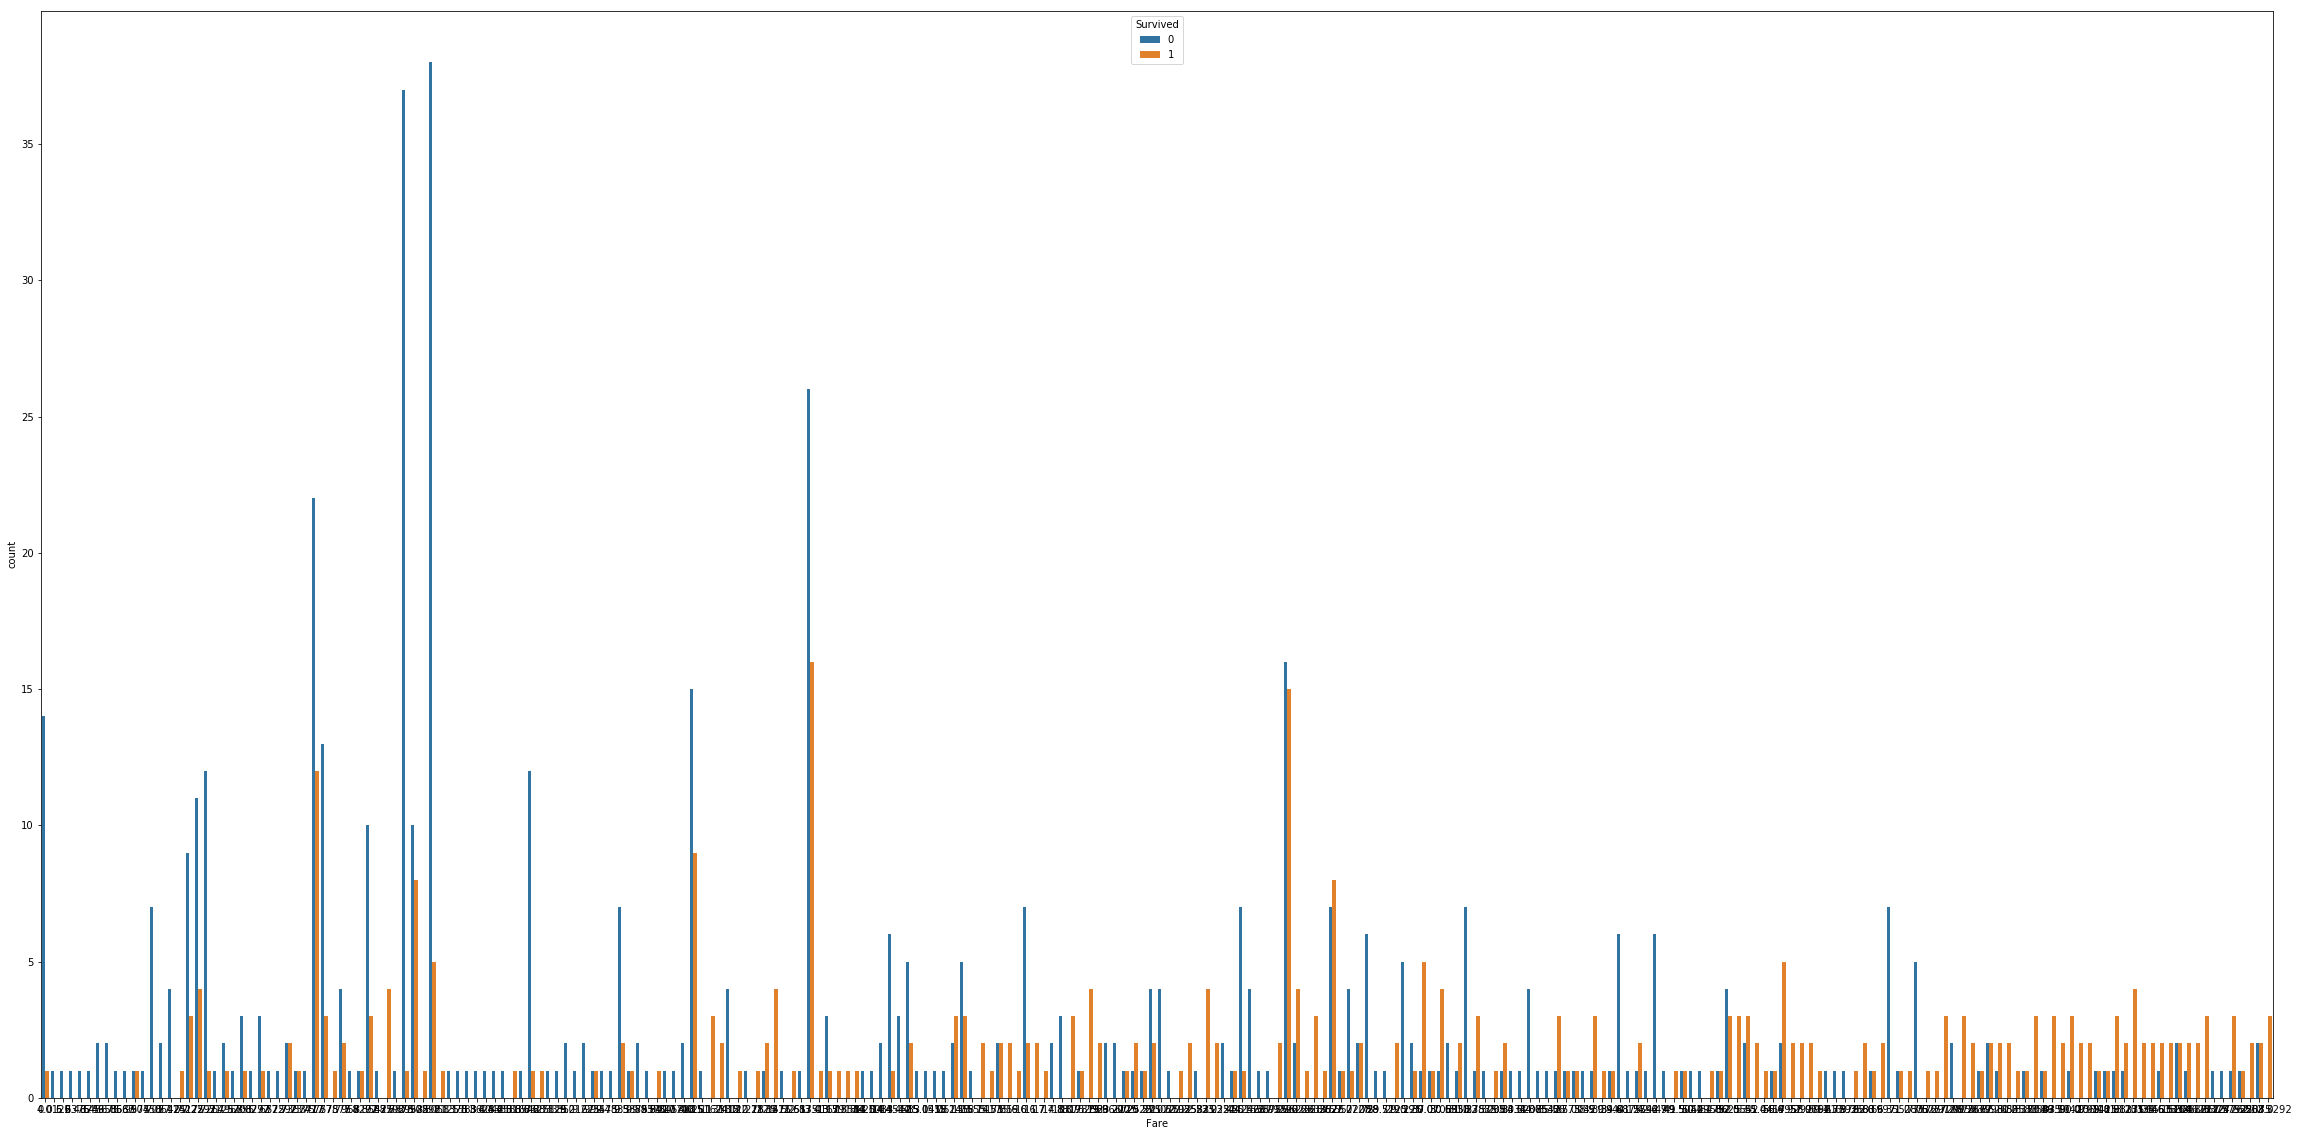

In [14]:
# Bar Chart to indicate the number of people survived based on their fare
# If you pay a higher fare, you have a higher chance of survival
plt.figure(figsize=(40,20))
sns.countplot(x = 'Fare', hue = 'Survived', data=training_set)

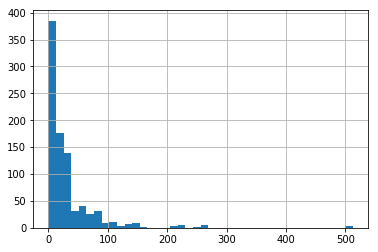

In [15]:
# Fare Histogram 
training_set['Fare'].hist(bins = 40)

## 3.3 Data Cleaning

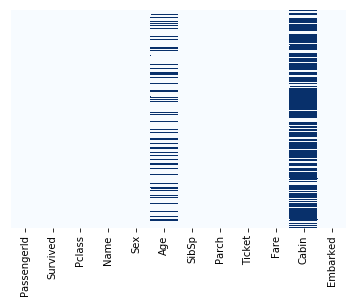

In [16]:
# Let's explore which dataset is missing
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [17]:
# Let's drop the cabin coloumn and test with inplace = true and false
training_set.drop('Cabin',axis=1,inplace=False)
training_set.drop('Cabin',axis=1,inplace=True)

In [18]:
#Let's drop the embarked as well
training_set.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'],axis=1,inplace=True)

In [19]:
training_set.head(2)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833

## 3.4 Remove NULL Data

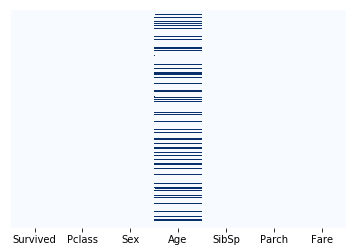

In [20]:
# Let's view the data one more time!
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

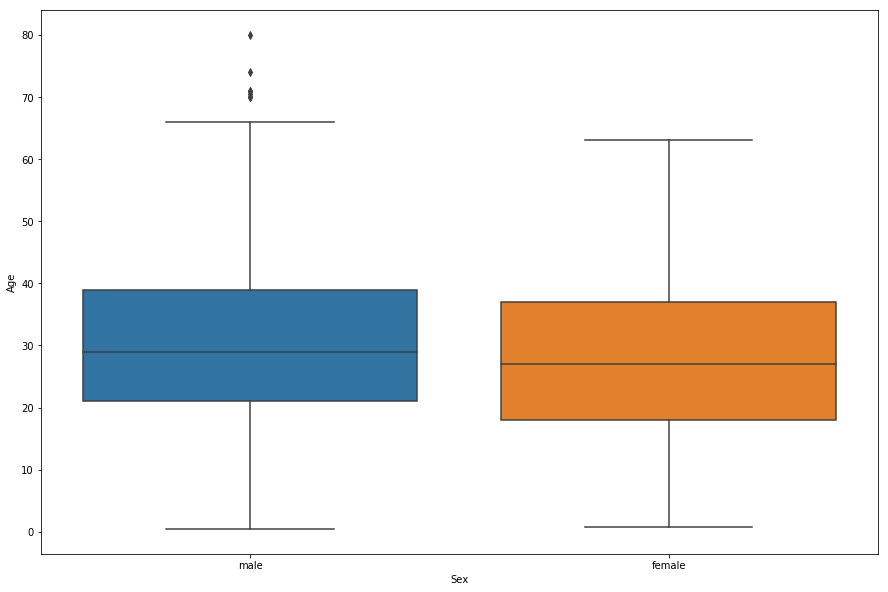

In [21]:
# Let's get the average age for male (~29) and female (~25)
plt.figure(figsize=(15, 10))
sns.boxplot(x='Sex', y='Age',data=training_set)

In [22]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex is 'male': 
            return 29
        else:
            return 25
    else:
        return age

In [23]:
training_set['Age'] = training_set[['Age','Sex']].apply(Fill_Age,axis=1)

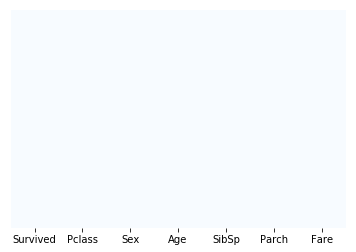

In [24]:
# Let's view the data one more time!
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

## 3.5 Handing Catagorized Variables

In [25]:
pd.get_dummies(training_set['Sex'])
# You just need one column only to represent male or female

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
5         0     1
6         0     1
7         0     1
8         1     0
9         1     0
10        1     0
11        1     0
12        0     1
13        0     1
14        1     0
15        1     0
16        0     1
17        0     1
18        1     0
19        1     0
20        0     1
21        0     1
22        1     0
23        0     1
24        1     0
25        1     0
26        0     1
27        0     1
28        1     0
29        0     1
..      ...   ...
861       0     1
862       1     0
863       1     0
864       0     1
865       1     0
866       1     0
867       0     1
868       0     1
869       0     1
870       0     1
871       1     0
872       0     1
873       0     1
874       1     0
875       1     0
876       0     1
877       0     1
878       0     1
879       1     0
880       1     0
881       0     1
882       1     0
883       0     1
884       0     1
885       1     0
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]

In [26]:
Male = pd.get_dummies(training_set['Sex'], drop_first = True)

In [27]:
Male.head(2)

male
0     1
1     0

In [28]:
# first let's drop the embarked and sex 
training_set.drop(['Sex'], axis=1, inplace=True)

In [29]:
training_set.head(2)

Survived  Pclass   Age  SibSp  Parch     Fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833

In [30]:
# Now let's add the encoded column male again
training_set = pd.concat([training_set, Male], axis=1)

In [31]:
training_set.head(2)

Survived  Pclass   Age  SibSp  Parch     Fare  male
0         0       3  22.0      1      0   7.2500     1
1         1       1  38.0      1      0  71.2833     0

# 4 Train Test Split

In [32]:
#Let's drop the target coloumn before we do train test split
X = training_set.drop('Survived',axis=1).values
y = training_set['Survived'].values

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 5 Select and Train a Model

## 5.1 Linear Regression Model

In [34]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# 6 Apply Model on Test Set

In [35]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

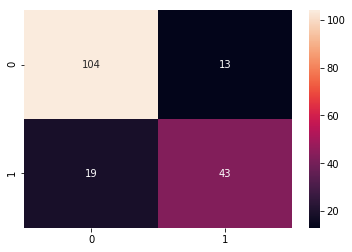

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

   micro avg       0.82      0.82      0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179

